In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import glob
import ipyparallel as ipp
import momi
import os
import pandas as pd
import PTA

from IPython.display import display

pd.set_option('display.max_columns', None)

ipyclient = ipp.Client(cluster_id="ipyrad")
print(len(ipyclient))

40


In [3]:
model = PTA.DemographicModel("expanding")
model.set_param("project_dir", "./analysis/24samps_expanding_sims")
model.set_param("npops", 7)
model.set_param("nsamps", 24)
model.set_param("N_e", "1e4-1e6")
model.set_param("tau", "1e4-1e6")
model.set_param("epsilon", "2-20")
model.set_param("length", "150")
#computationally impractical to simulate 2e4 loci for 20 pops, but this is how you'd do it.
#model.set_param("num_replicates", [nloci_dict[x] for x in expanding_pops])
model.set_param("num_replicates", 500)
model.set_param("recoms_per_gen", 0)
model.set_param("muts_per_gen", 6.6e-9)
print(model.get_params())

model._hackersonly["sorted_sfs"] = False
model._hackersonly["proportional_msfs"] = True
model.simulate(nsims=40000, quiet=False, verbose=False, ipyclient=ipyclient)

------- PTA params file (v.0.0.11)----------------------------------------------
expanding            ## [0] [simulation_name]: The name of this simulation scenario
/media/4TB/isaac/PTA-EasternSnakes/analysis/24samps_expanding_sims ## [1] [project_dir]: Where to save files
7                    ## [2] [npops]: Number of populations undergoing co-demographic processes
24                   ## [3] [nsamps]: Numbers of samples for each populations
10000-1000000        ## [4] [N_e]: Effective population size of the contemporary population
10000-1000000        ## [5] [tau]: Time of demographic change
2.0-20.0             ## [6] [epsilon]: Magnitude of demographic change
0                    ## [7] [zeta]: Proportion of coexpanding taxa. Default will sample U~(0, 1)
150                  ## [8] [length]: Length in bp of each independent genomic region to simulate
500,500,500,500,500,500,500 ## [9] [num_replicates]: Number of genomic regions to simulate
0.0                  ## [10] [recoms_per_g

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  [######              ]  31%  Performing Simulations    | 2:27:37 | 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  [##########          ]  51%  Performing Simulations    | 3:58:30 | 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  [#############       ]  66%  Performing Simulations    | 5:09:43 | 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  [###############     ]  79%  Performing Simulations    | 6:07:02 | 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  [#################   ]  88%  Performing Simulations    | 6:52:19 | 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  [################### ]  96%  Performing Simulations    | 7:26:34 | 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
sim_df = pd.read_csv("./analysis/24samps_expanding_sims/expanding-SIMOUT.csv", sep=" ")
print(len(sim_df))
sfs_cols = [col for col in sim_df.columns if col.startswith("pop")]
params_cols = [col for col in sim_df.columns if col not in sfs_cols]
display(sim_df[sfs_cols].head())
display(sim_df[params_cols].head())

40000


,pop0-[[23__1]],pop0-[[22__2]],pop0-[[21__3]],pop0-[[20__4]],pop0-[[19__5]],pop0-[[18__6]],pop0-[[17__7]],pop0-[[16__8]],pop0-[[15__9]],pop0-[[14_10]],pop0-[[13_11]],pop0-[[12_12]],pop1-[[23__1]],pop1-[[22__2]],pop1-[[21__3]],pop1-[[20__4]],pop1-[[19__5]],pop1-[[18__6]],pop1-[[17__7]],pop1-[[16__8]],pop1-[[15__9]],pop1-[[14_10]],pop1-[[13_11]],pop1-[[12_12]],pop2-[[23__1]],pop2-[[22__2]],pop2-[[21__3]],pop2-[[20__4]],pop2-[[19__5]],pop2-[[18__6]],pop2-[[17__7]],pop2-[[16__8]],pop2-[[15__9]],pop2-[[14_10]],pop2-[[13_11]],pop2-[[12_12]],pop3-[[23__1]],pop3-[[22__2]],pop3-[[21__3]],pop3-[[20__4]],pop3-[[19__5]],pop3-[[18__6]],pop3-[[17__7]],pop3-[[16__8]],pop3-[[15__9]],pop3-[[14_10]],pop3-[[13_11]],pop3-[[12_12]],pop4-[[23__1]],pop4-[[22__2]],pop4-[[21__3]],pop4-[[20__4]],pop4-[[19__5]],pop4-[[18__6]],pop4-[[17__7]],pop4-[[16__8]],pop4-[[15__9]],pop4-[[14_10]],pop4-[[13_11]],pop4-[[12_12]],pop5-[[23__1]],pop5-[[22__2]],pop5-[[21__3]],pop5-[[20__4]],pop5-[[19__5]],pop5-[[18__6]],pop5-[[17__7]],pop5-[[16__8]],pop5-[[15__9]],pop5-[[14_10]],pop5-[[13_11]],pop5-[[12_12]],pop6-[[23__1]],pop6-[[22__2]],pop6-[[21__3]],pop6-[[20__4]],pop6-[[19__5]],pop6-[[18__6]],pop6-[[17__7]],pop6-[[16__8]],pop6-[[15__9]],pop6-[[14_10]],pop6-[[13_11]],pop6-[[12_12]]
0,0.150,0.111,0.100,0.060,0.082,0.063,0.068,0.082,0.075,0.082,0.104,0.025,0.130,0.117,0.069,0.097,0.061,0.087,0.104,0.095,0.072,0.052,0.082,0.035,0.165,0.099,0.107,0.089,0.100,0.068,0.059,0.075,0.076,0.060,0.072,0.029,0.156,0.105,0.101,0.076,0.080,0.077,0.079,0.065,0.071,0.069,0.091,0.029,0.104,0.080,0.106,0.085,0.084,0.093,0.102,0.076,0.071,0.077,0.072,0.051,0.177,0.119,0.110,0.072,0.075,0.055,0.065,0.074,0.079,0.059,0.078,0.038,0.131,0.097,0.097,0.111,0.069,0.074,0.090,0.070,0.087,0.072,0.073,0.029
1,0.151,0.120,0.101,0.088,0.080,0.083,0.064,0.076,0.073,0.075,0.067,0.023,0.170,0.121,0.110,0.074,0.087,0.067,0.064,0.075,0.069,0.077,0.062,0.024,0.139,0.106,0.095,0.104,0.105,0.075,0.069,0.064,0.063,0.066,0.081,0.032,0.119,0.134,0.099,0.083,0.070,0.070,0.081,0.083,0.067,0.085,0.073,0.036,0.135,0.088,0.101,0.083,0.079,0.081,0.087,0.076,0.062,0.071,0.097,0.039,0.201,0.109,0.098,0.082,0.082,0.088,0.074,0.076,0.061,0.043,0.065,0.022,0.156,0.102,0.090,0.101,0.075,0.084,0.068,0.087,0.061,0.083,0.062,0.029
2,0.111,0.090,0.089,0.103,0.096,0.077,0.072,0.073,0.086,0.095,0.070,0.037,0.092,0.079,0.081,0.104,0.098,0.087,0.067,0.102,0.101,0.062,0.088,0.039,0.126,0.102,0.082,0.093,0.095,0.078,0.055,0.092,0.074,0.094,0.078,0.031,0.118,0.098,0.097,0.078,0.092,0.077,0.080,0.080,0.090,0.087,0.078,0.025,0.120,0.109,0.072,0.075,0.077,0.082,0.064,0.083,0.112,0.059,0.086,0.061,0.163,0.121,0.115,0.065,0.059,0.056,0.065,0.099,0.069,0.058,0.083,0.047,0.117,0.084,0.079,0.110,0.083,0.073,0.068,0.085,0.080,0.079,0.093,0.049
3,0.223,0.126,0.110,0.072,0.067,0.066,0.064,0.072,0.053,0.062,0.056,0.028,0.147,0.103,0.093,0.081,0.091,0.076,0.077,0.071,0.074,0.068,0.089,0.031,0.180,0.125,0.118,0.084,0.076,0.082,0.064,0.058,0.070,0.063,0.053,0.029,0.159,0.105,0.081,0.090,0.080,0.070,0.078,0.066,0.079,0.074,0.087,0.031,0.130,0.100,0.088,0.086,0.082,0.095,0.073,0.077,0.083,0.079,0.076,0.031,0.251,0.119,0.087,0.096,0.080,0.066,0.062,0.043,0.054,0.051,0.052,0.040,0.148,0.090,0.079,0.095,0.097,0.122,0.089,0.064,0.066,0.063,0.065,0.020
4,0.130,0.104,0.096,0.101,0.088,0.081,0.085,0.091,0.070,0.052,0.071,0.030,0.122,0.127,0.102,0.086,0.104,0.058,0.070,0.087,0.077,0.079,0.065,0.023,0.122,0.113,0.096,0.102,0.099,0.071,0.073,0.070,0.074,0.080,0.060,0.039,0.133,0.127,0.120,0.086,0.091,0.069,0.078,0.074,0.066,0.059,0.066,0.031,0.137,0.107,0.096,0.091,0.097,0.090,0.077,0.070,0.073,0.068,0.062,0.032,0.119,0.118,0.091,0.083,0.083,0.083,0.098,0.070,0.074,0.080,0.077,0.024,0.096,0.085,0.098,0.090,0.079,0.076,0.081,0.081,0.065,0.109,0.083,0.056


,zeta,zeta_e,psi,t_s,omega,taus_mean,taus_std,taus_skewness,taus_kurtosis,taus_median,taus_iqr,epsilons_mean,epsilons_std,epsilons_skewness,epsilons_kurtosis,epsilons_median,epsilons_iqr,Ne_s_mean,Ne_s_std,Ne_s_skewness,Ne_s_kurtosis,Ne_s_median,Ne_s_iqr
0,0.468,3,1,893075,0.0,656742.800,255427.393,-0.328,-1.776,779883.0,520835.0,11.419,3.296,1.114,-0.306,10.243,2.954,539614.000,289334.699,0.188,-1.438,455344.0,473215.5
1,0.071,0,0,213347,0.0,532243.429,273746.095,0.382,-1.522,415901.0,479491.0,11.220,6.244,-0.106,-1.774,12.950,12.257,562330.857,126496.248,0.020,-1.385,603846.0,194409.0
2,0.732,5,1,369980,0.0,602498.667,192505.499,0.050,-1.500,596125.0,235705.5,14.502,4.952,-0.706,-1.500,17.885,5.310,428185.714,195071.702,0.727,-0.994,354721.0,234881.5
3,0.105,1,0,884066,0.0,602425.000,221862.109,-1.299,1.008,632256.0,62521.0,5.782,2.160,-0.425,-1.079,6.032,3.067,497694.857,194513.272,-0.926,-0.398,536635.0,212823.5
4,0.830,6,1,468579,0.0,697768.000,229189.000,0.000,-2.000,697768.0,229189.0,18.058,1.434,0.000,-2.000,18.058,1.434,579633.714,285738.607,0.315,-1.368,583064.0,466865.0


In [5]:
from sklearn.ensemble import RandomForestRegressor
rgr_params = {'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 70,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
# This is super dumb
sim_df = pd.read_csv("./analysis/24samps_expanding_sims/expanding-SIMOUT.csv", sep=" ")
synthetic_community = pd.DataFrame(sim_df.loc[0]).T.drop(PTA.inference.default_targets, axis=1)


Removed invariant targets. Retained: ['zeta', 'zeta_e', 'psi', 't_s', 'omega', 'taus_mean', 'taus_std', 'taus_skewness', 'taus_kurtosis', 'taus_median', 'taus_iqr', 'epsilons_mean', 'epsilons_std', 'epsilons_skewness', 'epsilons_kurtosis', 'epsilons_median', 'epsilons_iqr', 'Ne_s_mean', 'Ne_s_std', 'Ne_s_skewness', 'Ne_s_kurtosis', 'Ne_s_median', 'Ne_s_iqr']
Predict() started: 2021-09-14 02:15:48.283288
Predict() finished: 2021-09-14 02:18:20.600228
                             MAE         RMSE    vscore        R2
zeta                    0.201639     0.001194  0.311271  0.311253
zeta_e                  1.424130     0.008503  0.315880  0.315862
psi                     0.296658     0.001864  0.167501  0.167485
t_s                179256.527660  1108.580903  0.393373  0.393286
omega                   0.020396     0.006074 -0.000544 -0.000544
taus_mean          103704.824367   664.049382  0.292151  0.291955
taus_std            72333.938997   450.871747  0.228533  0.228529
taus_skewness     

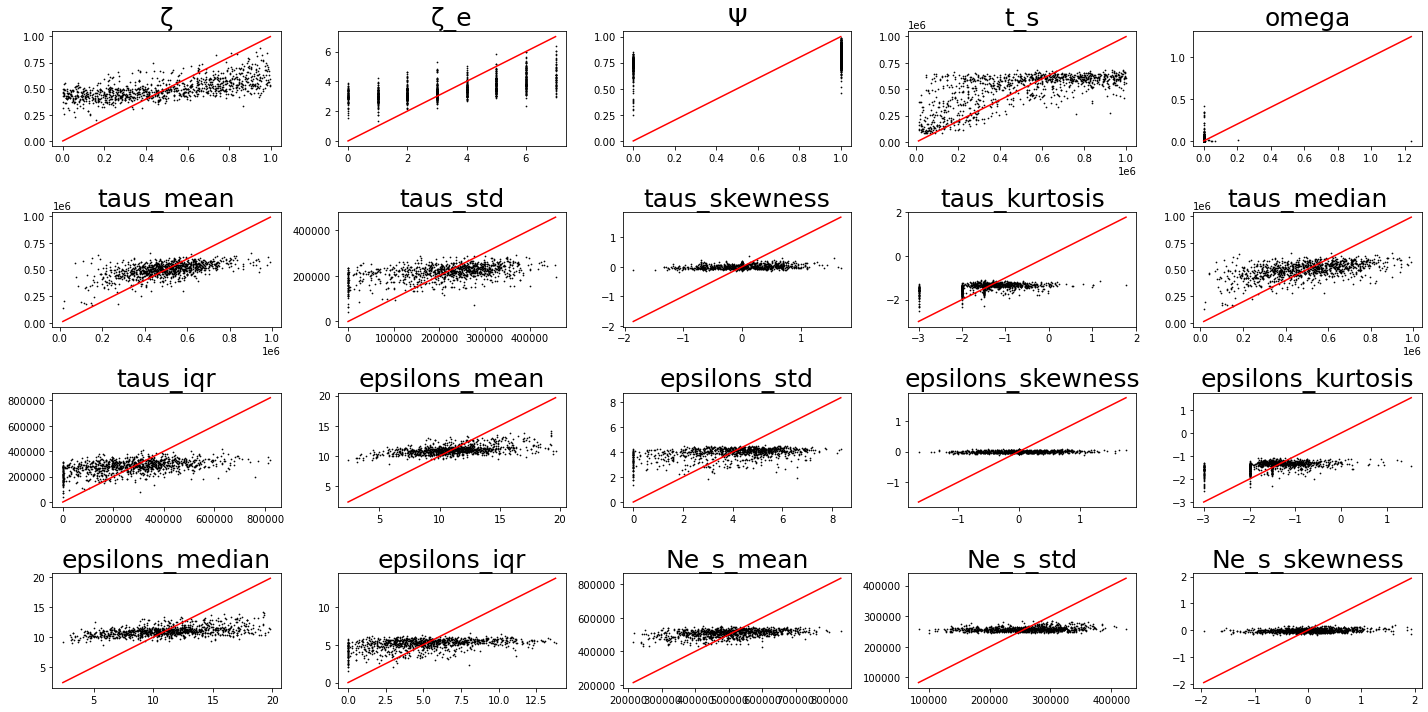

In [6]:
sim_df1 = pd.read_csv("./analysis/24samps_expanding_sims/expanding-SIMOUT.csv", sep=" ")
rgr1 = PTA.inference.Regressor(empirical_df=synthetic_community,\
                                sims=sim_df1,\
                                algorithm="rf",\
                                verbose=True)
rgr1.set_params(rgr_params)
#rgr1.set_targets(["zeta", "t_s", "omega"])
rgr1.predict(select_features=False,\
            param_search=False,\
            quick=False,\
            verbose=True)
cv_preds1 = rgr1.cross_val_predict(verbose=True)
cv_scores1 = rgr1.cross_val_score(verbose=True)
ax = rgr1.plot_cv_predictions(figsize=(20,10), figdims=(4,5))

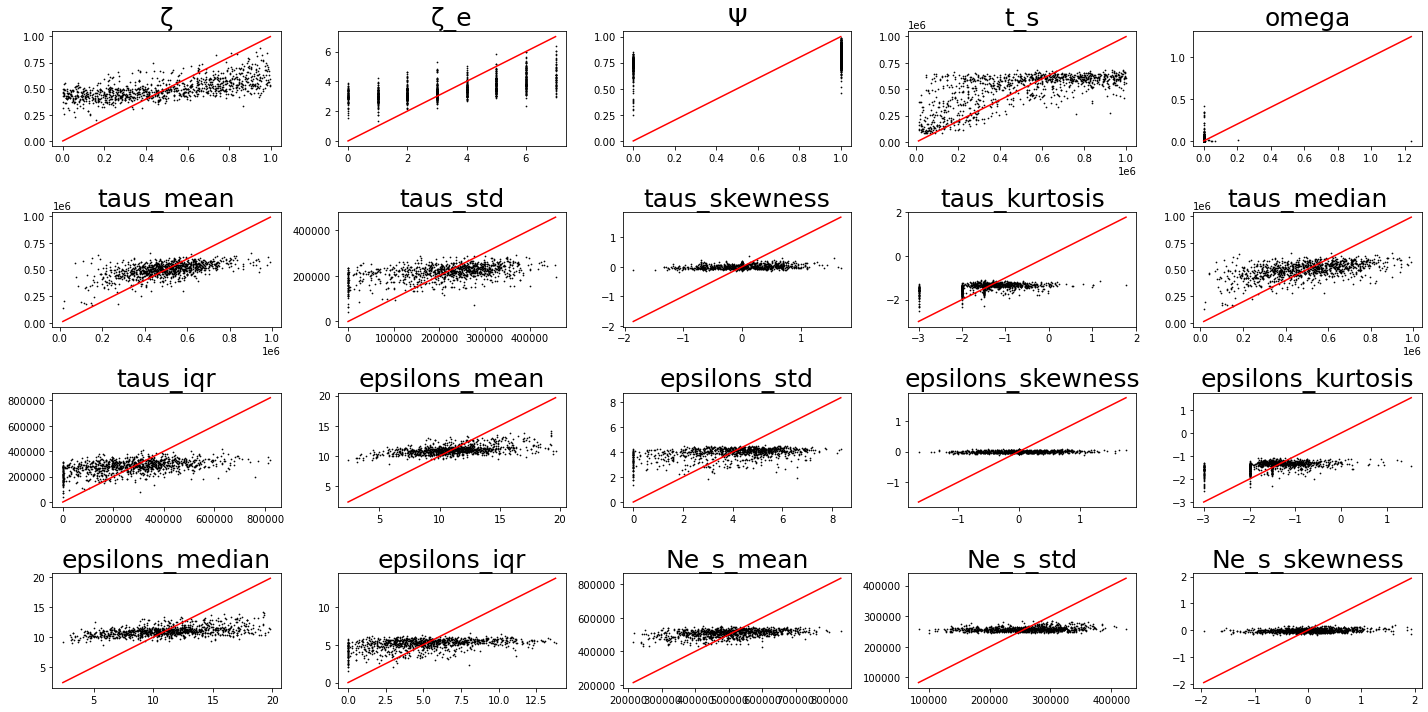

In [8]:
ax = rgr1.plot_cv_predictions(figsize=(20,10), figdims=(4,5))

In [48]:
sim_df1[sim_df1["omega"]>0]

,zeta,zeta_e,psi,t_s,omega,taus_mean,taus_std,taus_skewness,taus_kurtosis,taus_median,taus_iqr,epsilons_mean,epsilons_std,epsilons_skewness,epsilons_kurtosis,epsilons_median,epsilons_iqr,Ne_s_mean,Ne_s_std,Ne_s_skewness,Ne_s_kurtosis,Ne_s_median,Ne_s_iqr,pop0-[[13__1]],pop0-[[12__2]],pop0-[[11__3]],pop0-[[10__4]],pop0-[[9_5]],pop0-[[8_6]],pop0-[[7_7]],pop1-[[13__1]],pop1-[[12__2]],pop1-[[11__3]],pop1-[[10__4]],pop1-[[9_5]],pop1-[[8_6]],pop1-[[7_7]],pop2-[[13__1]],pop2-[[12__2]],pop2-[[11__3]],pop2-[[10__4]],pop2-[[9_5]],pop2-[[8_6]],pop2-[[7_7]],pop3-[[13__1]],pop3-[[12__2]],pop3-[[11__3]],pop3-[[10__4]],pop3-[[9_5]],pop3-[[8_6]],pop3-[[7_7]],pop4-[[13__1]],pop4-[[12__2]],pop4-[[11__3]],pop4-[[10__4]],pop4-[[9_5]],pop4-[[8_6]],pop4-[[7_7]],pop5-[[13__1]],pop5-[[12__2]],pop5-[[11__3]],pop5-[[10__4]],pop5-[[9_5]],pop5-[[8_6]],pop5-[[7_7]],pop6-[[13__1]],pop6-[[12__2]],pop6-[[11__3]],pop6-[[10__4]],pop6-[[9_5]],pop6-[[8_6]],pop6-[[7_7]],pop7-[[13__1]],pop7-[[12__2]],pop7-[[11__3]],pop7-[[10__4]],pop7-[[9_5]],pop7-[[8_6]],pop7-[[7_7]]
30,0.933,7,1,73202,0.010,75982.500,2780.500,0.000,-2.0,75982.5,2780.5,3.697,0.682,0.000,-2.0,3.697,0.682,575281.250,261171.643,-0.113,-0.769,542020.0,319956.50,0.296,0.180,0.144,0.130,0.102,0.102,0.045,0.295,0.195,0.139,0.118,0.099,0.102,0.051,0.302,0.176,0.143,0.131,0.111,0.091,0.046,0.309,0.183,0.141,0.119,0.101,0.106,0.041,0.295,0.189,0.139,0.128,0.105,0.100,0.045,0.291,0.183,0.139,0.127,0.113,0.103,0.043,0.306,0.189,0.137,0.122,0.104,0.102,0.040,0.286,0.194,0.135,0.129,0.102,0.100,0.054
219,0.805,6,1,312642,0.001,344465.667,22608.281,-0.678,-1.5,357705.0,25204.0,13.679,3.919,-0.693,-1.5,16.128,4.305,631470.875,189158.626,0.237,-0.903,631354.5,193515.00,0.232,0.174,0.156,0.132,0.118,0.127,0.062,0.212,0.176,0.159,0.139,0.130,0.127,0.057,0.211,0.170,0.144,0.146,0.134,0.125,0.069,0.215,0.183,0.141,0.139,0.128,0.120,0.075,0.214,0.173,0.156,0.151,0.122,0.126,0.058,0.224,0.157,0.154,0.138,0.125,0.131,0.071,0.192,0.162,0.154,0.140,0.147,0.127,0.078,0.207,0.166,0.170,0.121,0.136,0.133,0.067
316,0.814,7,1,390986,0.004,381354.000,9632.000,0.000,-2.0,381354.0,9632.0,8.421,3.619,-0.000,-2.0,8.421,3.619,468673.250,220765.562,0.150,-0.584,419284.5,242761.25,0.199,0.177,0.148,0.150,0.137,0.131,0.057,0.202,0.164,0.150,0.133,0.145,0.140,0.066,0.186,0.171,0.148,0.150,0.132,0.138,0.075,0.208,0.171,0.137,0.147,0.139,0.119,0.080,0.212,0.142,0.138,0.148,0.132,0.145,0.083,0.200,0.166,0.160,0.137,0.140,0.125,0.071,0.216,0.154,0.150,0.143,0.126,0.144,0.067,0.279,0.213,0.145,0.123,0.120,0.087,0.032
400,0.818,7,1,281420,0.009,275974.500,5445.500,0.000,-2.0,275974.5,5445.5,10.382,0.260,0.000,-2.0,10.382,0.260,488806.375,326628.787,0.322,-1.309,395865.5,517709.50,0.234,0.189,0.158,0.143,0.120,0.112,0.045,0.238,0.191,0.147,0.134,0.115,0.114,0.061,0.233,0.190,0.147,0.138,0.120,0.119,0.053,0.233,0.180,0.152,0.131,0.126,0.112,0.065,0.239,0.191,0.148,0.128,0.125,0.110,0.058,0.240,0.182,0.157,0.130,0.117,0.112,0.063,0.239,0.180,0.157,0.134,0.124,0.110,0.056,0.198,0.172,0.159,0.141,0.135,0.131,0.062
402,0.877,7,1,64714,4.269,64591.000,123.000,0.000,-2.0,64591.0,123.0,11.426,6.096,0.000,-2.0,11.426,6.096,387691.500,340753.384,0.483,-1.361,274740.0,593665.00,0.183,0.170,0.180,0.134,0.138,0.126,0.069,0.177,0.162,0.159,0.147,0.124,0.159,0.072,0.201,0.172,0.157,0.159,0.123,0.117,0.072,0.181,0.152,0.156,0.135,0.151,0.155,0.069,0.173,0.161,0.164,0.151,0.137,0.145,0.068,0.197,0.159,0.160,0.138,0.153,0.127,0.066,0.171,0.186,0.147,0.162,0.124,0.141,0.069,0.221,0.162,0.137,0.139,0.170,0.112,0.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11724,0.904,7,1,548603,0.003,561623.000,13020.000,0.000,-2.0,561623.0,13020.0,7.337,3.140,0.000,-2.0,7.337,3.140,670031.375,312729.173,

## Sorted summary statistics

In [2]:
model = PTA.DemographicModel("expanding-sorted")
model.set_param("project_dir", "./analysis/24samps_expanding_sims")
model.set_param("npops", 7)
model.set_param("nsamps", 24)
model.set_param("N_e", "1e4-1e6")
model.set_param("tau", "1e4-1e6")
model.set_param("epsilon", "2-20")
model.set_param("length", "150")
#computationally impractical to simulate 2e4 loci for 20 pops, but this is how you'd do it.
#model.set_param("num_replicates", [nloci_dict[x] for x in expanding_pops])
model.set_param("num_replicates", 500)
model.set_param("recoms_per_gen", 0)
model.set_param("muts_per_gen", 6.6e-9)
print(model.get_params())

model._hackersonly["sorted_sfs"] = True
model._hackersonly["proportional_msfs"] = True
model.simulate(nsims=4000, quiet=False, verbose=False, ipyclient=ipyclient)

------- PTA params file (v.0.0.11)----------------------------------------------
expanding-sorted     ## [0] [simulation_name]: The name of this simulation scenario
/media/4TB/isaac/PTA-EasternSnakes/analysis/24samps_expanding_sims ## [1] [project_dir]: Where to save files
7                    ## [2] [npops]: Number of populations undergoing co-demographic processes
24                   ## [3] [nsamps]: Numbers of samples for each populations
10000-1000000        ## [4] [N_e]: Effective population size of the contemporary population
10000-1000000        ## [5] [tau]: Time of demographic change
2.0-20.0             ## [6] [epsilon]: Magnitude of demographic change
0                    ## [7] [zeta]: Proportion of coexpanding taxa. Default will sample U~(0, 1)
150                  ## [8] [length]: Length in bp of each independent genomic region to simulate
500,500,500,500,500,500,500 ## [9] [num_replicates]: Number of genomic regions to simulate
0.0                  ## [10] [recoms_per_g

8000
Removed invariant targets. Retained: ['zeta', 'zeta_e', 'psi', 't_s', 'omega', 'taus_mean', 'taus_std', 'taus_skewness', 'taus_kurtosis', 'taus_median', 'taus_iqr', 'epsilons_mean', 'epsilons_std', 'epsilons_skewness', 'epsilons_kurtosis', 'epsilons_median', 'epsilons_iqr', 'Ne_s_mean', 'Ne_s_std', 'Ne_s_skewness', 'Ne_s_kurtosis', 'Ne_s_median', 'Ne_s_iqr']
Predict() started: 2021-09-14 08:41:05.129602
Predict() finished: 2021-09-14 08:41:27.339649
                             MAE         RMSE    vscore        R2
zeta                    0.185497     0.002478  0.402099  0.402059
zeta_e                  1.310546     0.017578  0.413493  0.413450
psi                     0.293076     0.004194  0.136401  0.136381
t_s                195061.056014  2667.738629  0.297535  0.297525
omega                   0.002024     0.000497 -0.006557 -0.006557
taus_mean          101632.005389  1457.961600  0.328730  0.328690
taus_std            69602.090798   972.116861  0.285955  0.285913
taus_skewness

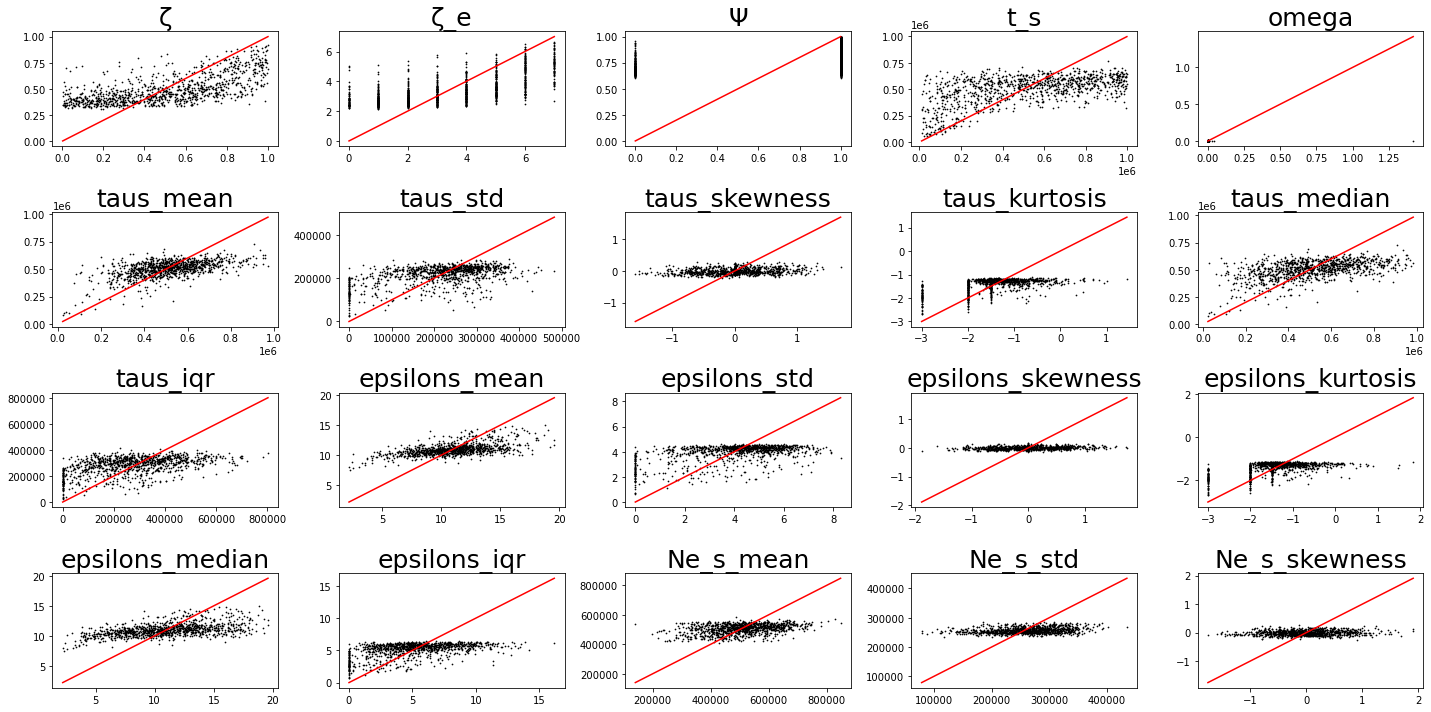

In [13]:
sim_df2 = pd.read_csv("./analysis/24samps_expanding_sims/expanding-sorted-SIMOUT.csv", sep=" ")
print(len(sim_df2))
rgr1 = PTA.inference.Regressor(empirical_df=synthetic_community,\
                                sims=sim_df2,\
                                algorithm="rf",\
                                verbose=True)
rgr1.set_params(rgr_params)
#rgr1.set_targets(["zeta", "t_s", "omega"])
rgr1.predict(select_features=False,\
            param_search=False,\
            quick=False,\
            verbose=True)
cv_preds1 = rgr1.cross_val_predict(verbose=True)
cv_scores1 = rgr1.cross_val_score(verbose=True)
ax = rgr1.plot_cv_predictions(figsize=(20,10), figdims=(4,5))

## Trash below here

In [47]:
model.simulate(nsims=1, quiet=False, verbose=False)

    Generating 1 simulation(s).
  [                    ]   0%  Performing Simulations    | 0:00:00 | > /home/isaac/PTA/PTA/demography.py(577)serial_simulate()
    575                 ## pulses, then this will have to change
    576                 import pdb; pdb.set_trace()
--> 577                 msfs.set_params(pd.Series([zeta, zeta_e, psi, taus[0], pops_per_tau, taus, epsilons, N_es],\
    578                                         index=["zeta", "zeta_e", "psi", "t_s", "pops_per_tau", "taus", "epsilons", "N_es"]))
    579                 msfs_list.append(msfs)

ipdb> n
> /home/isaac/PTA/PTA/demography.py(578)serial_simulate()
    576                 import pdb; pdb.set_trace()
    577                 msfs.set_params(pd.Series([zeta, zeta_e, psi, taus[0], pops_per_tau, taus, epsilons, N_es],\
--> 578                                         index=["zeta", "zeta_e", "psi", "t_s", "pops_per_tau", "taus", "epsilons", "N_es"]))
    579                 msfs_list.append(msfs)
    580 

i

In [41]:
import itertools
import numpy as np

def _sample_tau(ntaus=1, pops_per_tau=[6, 1, 1]):
    tau = (1000, 10000)
    if isinstance(tau, tuple):
        tau = (tau[0], tau[1]+1)
    else:
        tau = (tau, tau+1)
    taus = [[np.random.randint(tau[0], tau[1], 1)[0]] * x for x in pops_per_tau]
    return taus
ts = _sample_tau(pops_per_tau=[5,1,1,1])
ts = np.array(itertools.chain.from_iterable(ts))
ts

array(<itertools.chain object at 0x7fc9dee12940>, dtype=object)

[5, 5, 5, 5, 5]